In [1]:
import cv2
import matplotlib.pyplot as plt
import random
import math
import numpy as np

img = cv2.imread('./assets/doggo.jpg')
img = cv2.resize(img, (256, 256))

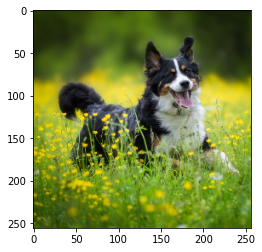

In [2]:
%matplotlib inline

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
def generate_random_pixel(img: np.ndarray) -> tuple:
    y, x, _ = img.shape
    
    i = random.randint(0, y-1)
    j = random.randint(0, x-1)
    
    # print(f'img[{i}][{j}] - {img[i][j]}')
    
    return img[i][j]

def get_pixel_avg(pixels: list) -> list:
    sum = [0, 0, 0]
    length = len(pixels)
    
    for pixel in pixels:
        pixel = list(pixel[0])
        sum[0] += pixel[0]
        sum[1] += pixel[1]
        sum[2] += pixel[2]
    
    # print(sum)
    avg_pixel = [int(sum[0]/length), int(sum[1]/length), int(sum[2]/length)]
    
    return avg_pixel

def euclidian_distance(p1: list, p2: list) -> float:
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2)

def pixel_to_str(pixel_in: list) -> str:
    pixel = list(pixel_in)
    for i in range(len(pixel)):
        pixel[i] = str(pixel[i])
    
    return '-'.join(pixel)

def str_to_pixel(pixel_str: str) -> list:
    pixel = pixel_str.split('-')
    
    return [int(pix) for pix in pixel]

def generate_pixel_hash(k: int, img: np.ndarray) -> tuple:
    pixel_hash = {}
    pixels = set()
    while len(pixels) < k:
        rand_pixel = pixel_to_str(generate_random_pixel(img))
        pixel_hash.update({rand_pixel: []})
        pixels.add(rand_pixel)
    
    return (pixel_hash, list(pixels))

def sort_pixels(img_in: np.ndarray, pixel_hash_in: dict) -> dict:
    img = img_in
    pixel_hash = pixel_hash_in
    
    for i in range(len(img)):
        for j in range(len(img[i])):
            img_pixel = img[i][j]
            
            lowest_dist = float('inf')
            closest_pixel = None
            for key, _ in pixel_hash.items():
                dist = euclidian_distance(str_to_pixel(key), img_pixel)
                
                if dist < lowest_dist:
                    lowest_dist = dist
                    closest_pixel = key
            
            arr = pixel_hash[closest_pixel]
            arr.append([img_pixel, (i, j)])
            pixel_hash[closest_pixel] = arr
    
    return pixel_hash

def assign_sorted_pixels(img_in: np.ndarray, pixel_hash_in: dict) -> tuple:
    img = img_in
    pixel_hash = pixel_hash_in
    prev_pixel_hash = pixel_hash_in
    for key, value in pixel_hash.items():
        for i in range(len(value)):
            pixel = value[i][0]
            coords = value[i][1]

            img[coords[0]][coords[1]] = str_to_pixel(key)
    
    return img, prev_pixel_hash

def subtract_arrs(c1, c2):
    diffs = []
    for i in range(len(c1)):
        diffs.append(c2[i] - c1[i])
    
    return diffs

In [4]:
def K_Means(img: np.ndarray, k: int) -> np.ndarray:
    diff_sum = float('inf')
    pixel_hash, pixel_list = generate_pixel_hash(k, img)
    prev_pixel_cats = {key: 0 for key, value in pixel_hash.items()}
    
    while diff_sum > 0:
        if type(img) == tuple:
            img = img[0]
        pixel_hash = sort_pixels(img, pixel_hash)
        
        new_img = assign_sorted_pixels(img, pixel_hash.copy())
        
        new_avgs = {pixel_to_str(get_pixel_avg(value)): [] for key, value in pixel_hash.items()}
        curr_pixel_cats = {key: len(value) for key, value in pixel_hash.items()}
        
        starting = 0
        for key, value in curr_pixel_cats.items():
            local_diff = abs(curr_pixel_cats[key] - prev_pixel_cats[key])
            
            starting += local_diff
        
        prev_pixel_cats = curr_pixel_cats
        img = new_img
        pixel_hash = new_avgs
        diff_sum = starting
        
        print(diff_sum)
    
    return new_img

In [5]:
final_img = K_Means(img.copy(), 25)
# print(final_img)

65536
0


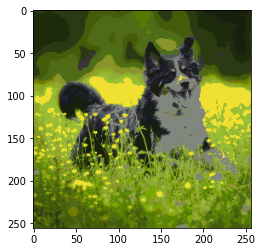

In [6]:
%matplotlib inline

plt.imshow(cv2.cvtColor(final_img[0], cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
cv2.imwrite('./clustered_images/k25/rendered-doggo.png', final_img[0])

True